In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, OneHotEncoder

from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor, StackingRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
import lightgbm as lgb

In [2]:
train_df = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
test_df = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')

In [3]:
#train_df.columns

In [4]:
#train_df.describe()

In [5]:
#train_df.dtypes[train_df.dtypes != 'object']

In [6]:
# plt.scatter(x='MSSubClass', y='SalePrice', data=train_df)

In [7]:
# plt.scatter(x='LotFrontage', y='SalePrice', data=train_df)

In [8]:
# train_df.query('LotFrontage > 300')
#Drop 935, 1299

In [9]:
# plt.scatter(x='LotArea', y='SalePrice', data=train_df)

In [10]:
# train_df.query('LotArea > 55000')
# 250, 314, 336, 707
#maybe 1397

In [11]:
# stats.zscore(train_df['LotArea']).sort_values().tail(10)

In [12]:
# plt.scatter(x='OverallQual', y='SalePrice', data=train_df)

In [13]:
# train_df.query('OverallQual == 10')
#maybe 524

In [14]:
# plt.scatter(x='OverallCond', y='SalePrice', data=train_df)

In [15]:
# train_df.query('OverallCond == 2')
#379

In [16]:
# train_df.query('OverallCond == 5 & SalePrice > 700000')
#1183

In [17]:
# train_df.query('OverallCond == 6 & SalePrice > 700000')
#692

In [18]:
# plt.scatter(x='YearBuilt', y='SalePrice', data=train_df)

In [19]:
# train_df.query('YearBuilt < 1900 & SalePrice > 400000')
#186

In [20]:
# plt.scatter(x='YearRemodAdd', y='SalePrice', data=train_df)

In [21]:
# train_df.query('YearRemodAdd < 1970 & SalePrice > 300000')
#314

In [22]:
# plt.scatter(x='MasVnrArea', y='SalePrice', data=train_df)

In [23]:
# train_df.query('MasVnrArea > 1500')
#298

In [24]:
# plt.scatter(x='BsmtFinSF1', y='SalePrice', data=train_df)

In [25]:
# train_df.query('BsmtFinSF1 > 5000')
#1299

In [26]:
# plt.scatter(x='BsmtFinSF2', y='SalePrice', data=train_df)

In [27]:
# train_df.query('BsmtFinSF2 > 400 & SalePrice > 500000')
#441

In [28]:
# plt.scatter(x='BsmtUnfSF', y='SalePrice', data=train_df)

In [29]:
# plt.scatter(x='TotalBsmtSF', y='SalePrice', data=train_df)

In [30]:
# train_df.query('TotalBsmtSF > 5000')
#1299

In [31]:
# plt.scatter(x='1stFlrSF', y='SalePrice', data=train_df)

In [32]:
# plt.scatter(x='2ndFlrSF', y='SalePrice', data=train_df)

In [33]:
# plt.scatter(x='LowQualFinSF', y='SalePrice', data=train_df)

In [34]:
# train_df.query('LowQualFinSF > 500')
#186

In [35]:
# plt.scatter(x='GrLivArea', y='SalePrice', data=train_df)

In [36]:
# train_df.query('GrLivArea > 4400')
#524, 1299

In [37]:
# plt.scatter(x='BsmtFullBath', y='SalePrice', data=train_df)

In [38]:
# train_df.query('BsmtFullBath == 3')
#739

In [39]:
# plt.scatter(x='BsmtHalfBath', y='SalePrice', data=train_df)

In [40]:
# stats.zscore(train_df['BsmtHalfBath']).unique()

In [41]:
# train_df.query('BsmtHalfBath == 2')
#598, 955

In [42]:
# plt.scatter(x='FullBath', y='SalePrice', data=train_df)

In [43]:
# plt.scatter(x='HalfBath', y='SalePrice', data=train_df)

In [44]:
# plt.scatter(x='BedroomAbvGr', y='SalePrice', data=train_df)

In [45]:
# train_df.query('BedroomAbvGr == 8')
#636

In [46]:
# plt.scatter(x='KitchenAbvGr', y='SalePrice', data=train_df)

In [47]:
# train_df.query('KitchenAbvGr == 0')
#49, 810, 955

In [48]:
# plt.scatter(x='TotRmsAbvGrd', y='SalePrice', data=train_df)

In [49]:
# train_df.query('TotRmsAbvGrd == 14')
#636

In [50]:
# plt.scatter(x='Fireplaces', y='SalePrice', data=train_df)


In [51]:
# plt.scatter(x='GarageYrBlt', y='SalePrice', data=train_df)

In [52]:
# plt.scatter(x='GarageCars', y='SalePrice', data=train_df)

In [53]:
# plt.scatter(x='GarageArea', y='SalePrice', data=train_df)

In [54]:
# train_df.query('GarageArea > 1200')
#1062, 1191

In [55]:
# stats.zscore(train_df['GarageArea']).sort_values().tail(10)

In [56]:
# plt.scatter(x='WoodDeckSF', y='SalePrice', data=train_df)
#remove 54

In [57]:
# stats.zscore(train_df['WoodDeckSF']).sort_values().tail(10)
#train_df.query('WoodDeckSF > 800')

In [58]:
# plt.scatter(x='OpenPorchSF', y='SalePrice', data=train_df)

In [59]:
# train_df.query('OpenPorchSF > 500')
# stats.zscore(train_df['OpenPorchSF']).sort_values().tail(10)
#496

In [60]:
# plt.scatter(x='EnclosedPorch', y='SalePrice', data=train_df)

In [61]:
# train_df.query('EnclosedPorch > 500')
#198

In [62]:
# plt.scatter(x='3SsnPorch', y='SalePrice', data=train_df)
# stats.zscore(train_df['3SsnPorch']).sort_values().tail(10)
#remove 206

In [63]:
# plt.scatter(x='ScreenPorch', y='SalePrice', data=train_df)

In [64]:
# plt.scatter(x='PoolArea', y='SalePrice', data=train_df)

In [65]:
values = [598, 955, 935, 1299, 250, 314, 336, 707, 379, 1183, 692, 186, 441, 186, 524, 739, 598, 955, 636, 1062, 1191, 496, 198, 1338, 206]

In [66]:
train_df = train_df[train_df.Id.isin(values) == False]

In [67]:
#checking null values
#pd.DataFrame(train_df.isnull().sum().sort_values(ascending=False)).head(20)

In [68]:
# train_df['MiscFeature'].unique()

In [69]:
# train_df['Alley'].unique()

In [70]:
train_df['Alley'].fillna('No', inplace=True)
test_df['Alley'].fillna('No', inplace=True)

In [71]:
# sns.catplot(data=train_df, x="Alley", y="SalePrice", kind="box")

In [72]:
#train_df['Fence'].unique()

In [73]:
train_df['Fence'].fillna('No', inplace=True)
test_df['Fence'].fillna('No', inplace=True)

In [74]:
# sns.catplot(data=train_df, x="Fence", y="SalePrice", kind="box")

In [75]:
#train_df['MasVnrType'].unique()

In [76]:
train_df['MasVnrType'].fillna('No', inplace=True)
test_df['MasVnrType'].fillna('No', inplace=True)

In [77]:
# sns.catplot(data=train_df, x="MasVnrType", y="SalePrice", kind="box")

In [78]:
train_df['MasVnrArea'].fillna(0, inplace=True)
test_df['MasVnrArea'].fillna(0, inplace=True)

In [79]:
#train_df['FireplaceQu'].unique()

In [80]:
train_df['FireplaceQu'].fillna('No', inplace=True)
test_df['FireplaceQu'].fillna('No', inplace=True)

In [81]:
# sns.catplot(data=train_df, x="FireplaceQu", y="SalePrice", kind="box")

In [82]:
# sns.catplot(data=train_df, x="Fireplaces", y="SalePrice", kind="box")

In [83]:
train_df['LotFrontage'].fillna(0, inplace=True)
test_df['LotFrontage'].fillna(0, inplace=True)

In [84]:
#train_df['GarageYrBlt'].corr(train_df['YearBuilt'])

In [85]:
#train_df['GarageCond'].unique()

In [86]:
train_df['GarageCond'].fillna('No', inplace=True)
test_df['GarageCond'].fillna('No', inplace=True)

In [87]:
# sns.catplot(data=train_df, x="GarageCond", y="SalePrice", kind="box")

In [88]:
train_df['GarageType'].fillna('No', inplace=True)
test_df['GarageType'].fillna('No', inplace=True)

In [89]:
# sns.catplot(data=train_df, x="GarageType", y="SalePrice", kind="box")

In [90]:
train_df['GarageFinish'].fillna('No', inplace=True)
test_df['GarageFinish'].fillna('No', inplace=True)

In [91]:
# sns.catplot(data=train_df, x="GarageFinish", y="SalePrice", kind="box")

In [92]:
train_df['GarageQual'].fillna('No', inplace=True)
test_df['GarageQual'].fillna('No', inplace=True)

In [93]:
# sns.catplot(data=train_df, x="GarageQual", y="SalePrice", kind="box")

In [94]:
# train_df['BsmtFinType2'].unique()
# sns.catplot(data=train_df, x="BsmtFinType2", y="SalePrice", kind="box")

In [95]:
train_df['BsmtFinType2'].fillna('Unf', inplace=True)
test_df['BsmtFinType2'].fillna('Unf', inplace=True)

In [96]:
# sns.catplot(data=train_df, x="BsmtFinType2", y="SalePrice", kind="box")

In [97]:
#train_df['BsmtExposure'].unique()

In [98]:
train_df['BsmtExposure'].fillna('No', inplace=True)
test_df['BsmtExposure'].fillna('No', inplace=True)

In [99]:
# sns.catplot(data=train_df, x="BsmtExposure", y="SalePrice", kind="box")

In [100]:
#train_df['BsmtQual'].unique()

In [101]:
train_df['BsmtQual'].fillna('No', inplace=True)
test_df['BsmtQual'].fillna('No', inplace=True)

In [102]:
# sns.catplot(data=train_df, x="BsmtQual", y="SalePrice", kind="box")

In [103]:
#train_df['BsmtCond'].unique()

In [104]:
train_df['BsmtCond'].fillna('No', inplace=True)
test_df['BsmtCond'].fillna('No', inplace=True)

In [105]:
# sns.catplot(data=train_df, x="BsmtCond", y="SalePrice", kind="box")

In [106]:
#train_df['BsmtFinType1'].unique()

In [107]:
train_df['BsmtFinType1'].fillna('Unf', inplace=True)
test_df['BsmtFinType1'].fillna('Unf', inplace=True)

In [108]:
# sns.catplot(data=train_df, x="BsmtFinType1", y="SalePrice", kind="box")

In [109]:
train_df['MasVnrArea'].fillna(0, inplace=True)
test_df['MasVnrArea'].fillna(0, inplace=True)

In [110]:
train_df['Electrical'].fillna('SBrkr', inplace=True)
test_df['Electrical'].fillna('SBrkr', inplace=True)

In [111]:
train_df = train_df.drop(columns=['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'GarageYrBlt', 'GarageCond', 'BsmtFinType2'])
test_df = test_df.drop(columns=['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'GarageYrBlt', 'GarageCond', 'BsmtFinType2'])

<Axes: >

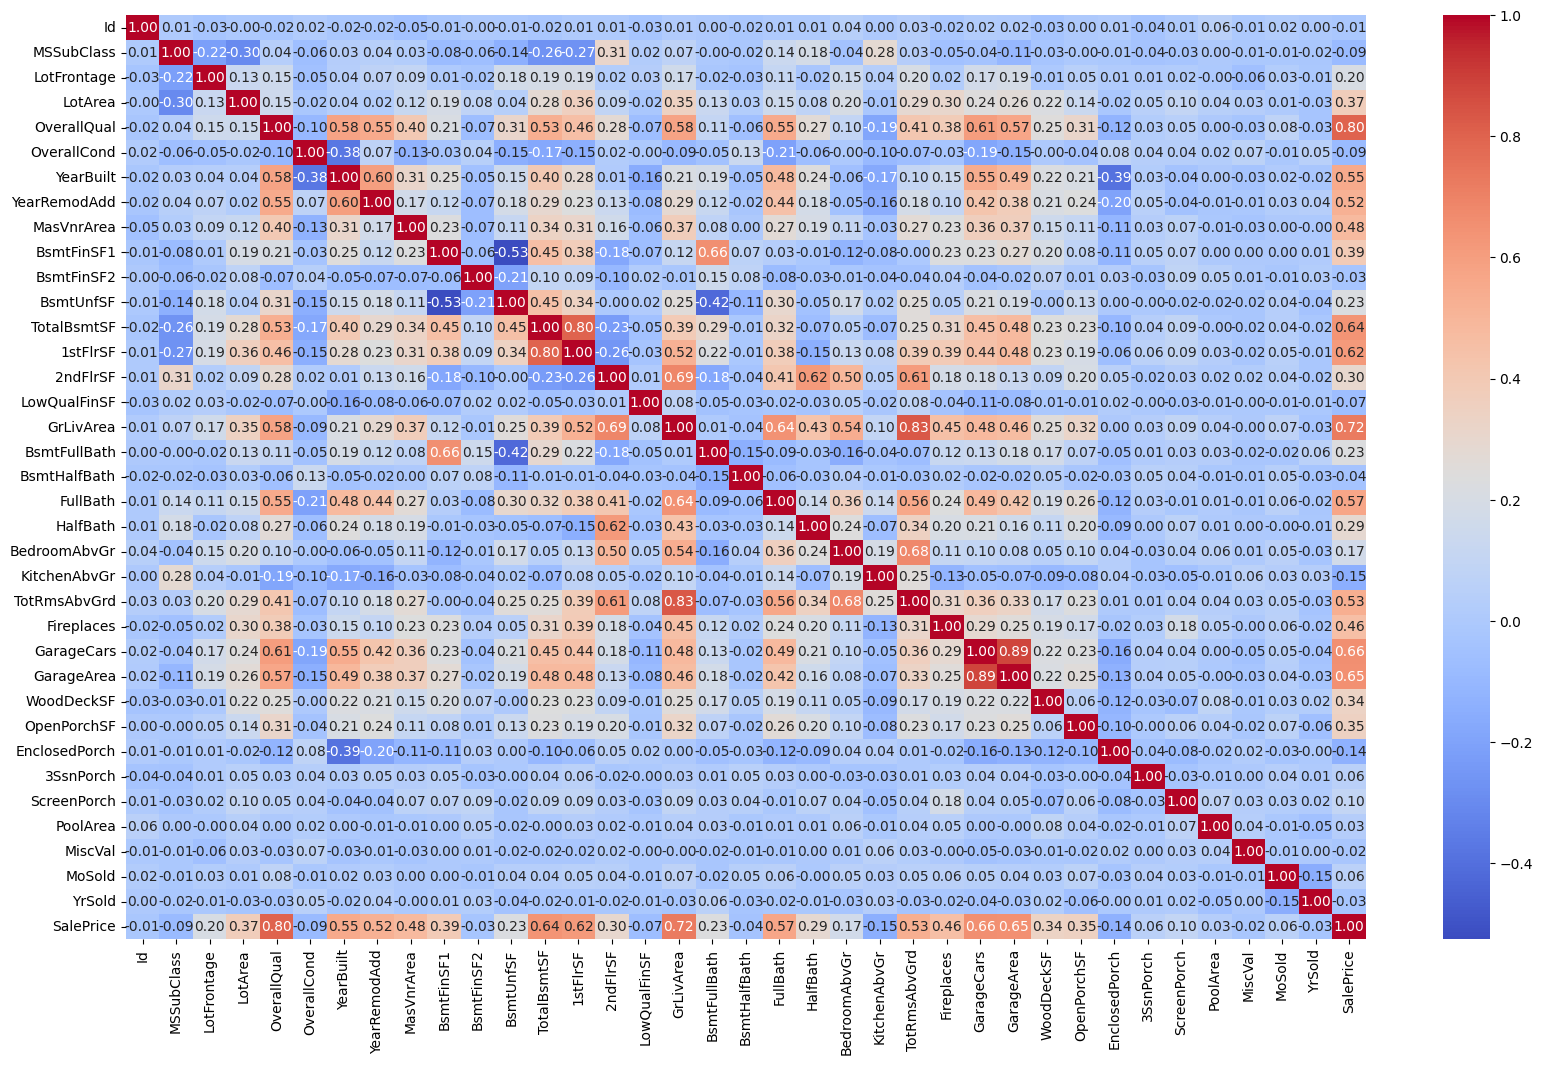

In [112]:
#checking to see all other variables that can cause collinearity
correlation_matrix = train_df.corr(numeric_only=True)
plt.figure(figsize=(20,12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

In [113]:
#drop GarageArea or GarageCars because of collinearity 
train_df = train_df.drop(columns=['GarageArea'])
test_df = test_df.drop(columns=['GarageArea'])

In [114]:
#feature engineering

In [115]:
train_df['houseage'] = train_df['YrSold'] - train_df['YearBuilt']
test_df['houseage'] = test_df['YrSold'] - test_df['YearBuilt']

In [116]:
train_df['houseremodelage'] = train_df['YrSold'] - train_df['YearRemodAdd']
test_df['houseremodelage'] = test_df['YrSold'] - test_df['YearRemodAdd']

In [117]:
train_df['totalsf'] = train_df['1stFlrSF'] + train_df['2ndFlrSF'] + train_df['BsmtFinSF1'] + train_df['BsmtFinSF2']
test_df['totalsf'] = test_df['1stFlrSF'] + test_df['2ndFlrSF'] + test_df['BsmtFinSF1'] + test_df['BsmtFinSF2']

In [118]:
train_df['totalarea'] = train_df['GrLivArea'] + train_df['TotalBsmtSF']
test_df['totalarea'] = test_df['GrLivArea'] + test_df['TotalBsmtSF']

In [119]:
train_df['totalbaths'] = train_df['BsmtFullBath'] + train_df['FullBath'] + 0.5 * (train_df['BsmtHalfBath'] + train_df['HalfBath']) 
test_df['totalbaths'] = test_df['BsmtFullBath'] + test_df['FullBath'] + 0.5 * (test_df['BsmtHalfBath'] + test_df['HalfBath']) 

In [120]:
train_df['totalporchsf'] = train_df['OpenPorchSF'] + train_df['3SsnPorch'] + train_df['EnclosedPorch'] + train_df['ScreenPorch'] + train_df['WoodDeckSF']
test_df['totalporchsf'] = test_df['OpenPorchSF'] + test_df['3SsnPorch'] + test_df['EnclosedPorch'] + test_df['ScreenPorch'] + test_df['WoodDeckSF']

In [121]:
train_df = train_df.drop(columns=['Id','YrSold', 'YearBuilt', 'YearRemodAdd', '1stFlrSF', '2ndFlrSF', 'BsmtFinSF1', 'BsmtFinSF2', 'GrLivArea', 'TotalBsmtSF','BsmtFullBath', 'FullBath', 'BsmtHalfBath', 'HalfBath', 'OpenPorchSF', '3SsnPorch', 'EnclosedPorch', 'ScreenPorch','WoodDeckSF'])
test_df = test_df.drop(columns=['YrSold', 'YearBuilt', 'YearRemodAdd', '1stFlrSF', '2ndFlrSF', 'BsmtFinSF1', 'BsmtFinSF2', 'GrLivArea', 'TotalBsmtSF','BsmtFullBath', 'FullBath', 'BsmtHalfBath', 'HalfBath', 'OpenPorchSF', '3SsnPorch', 'EnclosedPorch', 'ScreenPorch','WoodDeckSF'])

<Axes: xlabel='SalePrice', ylabel='Count'>

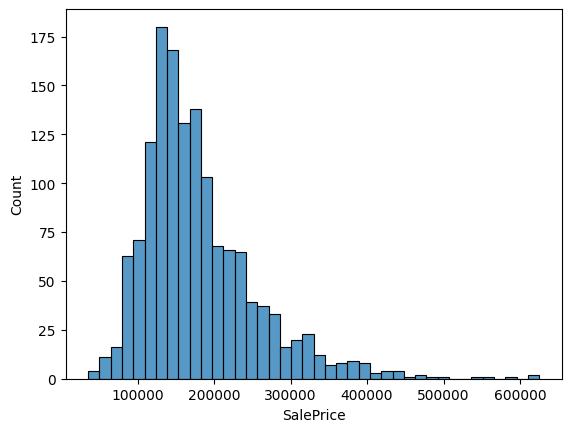

In [122]:
sns.histplot(
    train_df,
    x=train_df['SalePrice']
)

In [123]:
train_df['SalePrice'] = np.log1p(train_df['SalePrice'])

<Axes: xlabel='SalePrice', ylabel='Count'>

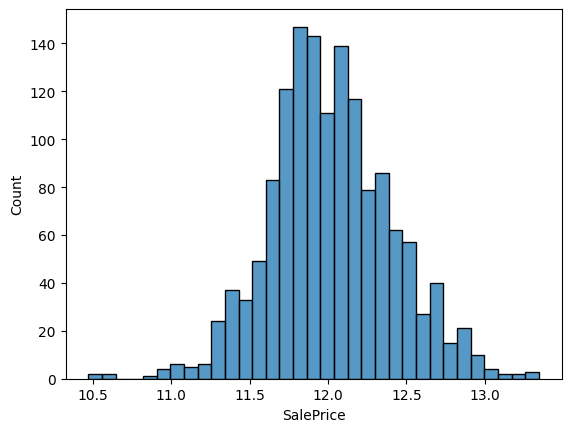

In [124]:
sns.histplot(
    train_df,
    x=train_df['SalePrice']
)

In [125]:
train_df.dtypes[train_df.dtypes=='object']

MSZoning         object
Street           object
LotShape         object
LandContour      object
Utilities        object
LotConfig        object
LandSlope        object
Neighborhood     object
Condition1       object
Condition2       object
BldgType         object
HouseStyle       object
RoofStyle        object
RoofMatl         object
Exterior1st      object
Exterior2nd      object
MasVnrType       object
ExterQual        object
ExterCond        object
Foundation       object
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
Heating          object
HeatingQC        object
CentralAir       object
Electrical       object
KitchenQual      object
Functional       object
FireplaceQu      object
GarageType       object
GarageFinish     object
GarageQual       object
PavedDrive       object
SaleType         object
SaleCondition    object
dtype: object

In [126]:
train_df.dtypes[train_df.dtypes !='object']

MSSubClass           int64
LotFrontage        float64
LotArea              int64
OverallQual          int64
OverallCond          int64
MasVnrArea         float64
BsmtUnfSF            int64
LowQualFinSF         int64
BedroomAbvGr         int64
KitchenAbvGr         int64
TotRmsAbvGrd         int64
Fireplaces           int64
GarageCars           int64
PoolArea             int64
MiscVal              int64
MoSold               int64
SalePrice          float64
houseage             int64
houseremodelage      int64
totalsf              int64
totalarea            int64
totalbaths         float64
totalporchsf         int64
dtype: object

In [127]:
ode_cols = ['LotShape', 'LandContour','Utilities','LandSlope',  'BsmtQual',  'BsmtFinType1',  'CentralAir',  'Functional', \
           'FireplaceQu', 'GarageFinish', 'GarageQual', 'PavedDrive', 'ExterCond', 'KitchenQual', 'BsmtExposure', 'HeatingQC','ExterQual', 'BsmtCond']

In [128]:
ohe_cols = ['Street', 'LotConfig','Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', \
           'MasVnrType','Foundation',  'Electrical',  'SaleType', 'MSZoning', 'SaleCondition', 'Heating', 'GarageType', 'RoofMatl']

In [129]:
num_cols = train_df.select_dtypes(include=['int64', 'float64']).columns
num_cols = num_cols.drop('SalePrice')

In [130]:
num_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

In [131]:
ode_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('ode', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
])

In [132]:
ohe_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('ohe', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

In [133]:
col_trans = ColumnTransformer(transformers=[
    ('num_p', num_pipeline, num_cols),
    ('ode_p', ode_pipeline, ode_cols),
    ('ohe_p', ohe_pipeline, ohe_cols),
    ],
    remainder='passthrough', 
    n_jobs=-1)

In [134]:
pipeline = Pipeline(steps=[
    ('preprocessing', col_trans)
])

In [135]:
X = train_df.drop('SalePrice', axis=1)
y = train_df['SalePrice']

In [136]:
X_preprocessed = pipeline.fit_transform(X)

In [137]:
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=25)

In [138]:
#build models

In [139]:
lr = LinearRegression()

In [140]:
lr.fit(X_train, y_train)

LinearRegression()

In [141]:
y_pred_lr = lr.predict(X_test)

In [142]:
mean_squared_error(y_test, y_pred_lr)

358821045008267.1

In [143]:
RFR = RandomForestRegressor(random_state=13)

In [144]:
param_grid_RFR = {
    'max_depth': [5, 10, 15],
    'n_estimators': [100, 250, 500],
    'min_samples_split': [3, 5, 10]
}

In [145]:
rfr_cv = GridSearchCV(RFR, param_grid_RFR, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

In [146]:
rfr_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=13), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15],
                         'min_samples_split': [3, 5, 10],
                         'n_estimators': [100, 250, 500]},
             scoring='neg_mean_squared_error')

In [147]:
np.sqrt(-1 * rfr_cv.best_score_)

0.13323089498146554

In [148]:
rfr_cv.best_params_

{'max_depth': 15, 'min_samples_split': 3, 'n_estimators': 250}

In [149]:
XGB = XGBRegressor(random_state=13)

In [150]:
param_grid_XGB = {
    'learning_rate': [0.05, 0.1, 0.2],
    'n_estimators': [300],
    'max_depth': [3],
    'min_child_weight': [1,2,3],
    'gamma': [0, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
}

In [151]:
xgb_cv = GridSearchCV(XGB, param_grid_XGB, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)

In [152]:
xgb_cv.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=13, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 0.9, 1.0],
                         'gamma': [0, 0.1, 0.2],
                         'learning_rate': [0.05, 0.1, 0.2], 'max_depth': [3],
                         'min_child_weight': [1, 2, 3], 'n_estimators': [300],
                         'subsample': [0.8, 0.9, 1.0]},
             scoring='neg_mean_squared_error')

In [153]:
np.sqrt(-1 * xgb_cv.best_score_)

0.11725327611036475

In [154]:
ridge = Ridge()

In [155]:
param_grid_ridge = {
    'alpha': [0.05, 0.1, 1, 3, 5, 10],
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag']
}

In [156]:
ridge_cv = GridSearchCV(ridge, param_grid_ridge, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

In [157]:
ridge_cv.fit(X_train, y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.05, 0.1, 1, 3, 5, 10],
                         'solver': ['auto', 'svd', 'cholesky', 'lsqr',
                                    'sparse_cg', 'sag']},
             scoring='neg_mean_squared_error')

In [158]:
np.sqrt(-1 * ridge_cv.best_score_)

0.11372059888613832

In [159]:
GBR = GradientBoostingRegressor()

In [160]:
param_grid_GBR = {
    'max_depth': [12, 15, 20],
    'n_estimators': [200, 300, 1000],
    'min_samples_leaf': [10, 25, 50],
    'learning_rate': [0.001, 0.01, 0.1],
    'max_features': [0.01, 0.1, 0.7]
}

In [161]:
GBR_cv = GridSearchCV(GBR, param_grid_GBR, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

In [162]:
GBR_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1],
                         'max_depth': [12, 15, 20],
                         'max_features': [0.01, 0.1, 0.7],
                         'min_samples_leaf': [10, 25, 50],
                         'n_estimators': [200, 300, 1000]},
             scoring='neg_mean_squared_error')

In [163]:
np.sqrt(-1 * GBR_cv.best_score_)

0.11424592248773369

In [164]:
lgbm_regressor = lgb.LGBMRegressor()

In [165]:
param_grid_lgbm = {
    'boosting_type': ['gbdt', 'dart'],
    'num_leaves': [20, 30, 40],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 300]
}

In [166]:
lgbm_cv = GridSearchCV(lgbm_regressor, param_grid_lgbm, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)

In [167]:
lgbm_cv.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=LGBMRegressor(), n_jobs=-1,
             param_grid={'boosting_type': ['gbdt', 'dart'],
                         'learning_rate': [0.01, 0.05, 0.1],
                         'n_estimators': [100, 200, 300],
                         'num_leaves': [20, 30, 40]},
             scoring='neg_mean_squared_error')

In [168]:
np.sqrt(-1 * lgbm_cv.best_score_)

0.1242168167755859

In [169]:
catboost = CatBoostRegressor(loss_function='RMSE', verbose=False)

In [170]:
param_grid_cat ={
    'iterations': [100, 500, 1000],
    'depth': [4, 6, 8, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.5]
}

In [171]:
cat_cv = GridSearchCV(catboost, param_grid_cat, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)

In [172]:
cat_cv.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=<catboost.core.CatBoostRegressor object at 0x79d885eebd00>,
             n_jobs=-1,
             param_grid={'depth': [4, 6, 8, 10], 'iterations': [100, 500, 1000],
                         'learning_rate': [0.01, 0.05, 0.1, 0.5]},
             scoring='neg_mean_squared_error')

In [173]:
np.sqrt(-1 * cat_cv.best_score_)

0.11839539170112859

In [174]:
vr = VotingRegressor([('gbr', GBR_cv.best_estimator_),
                      ('xgb', xgb_cv.best_estimator_),
                      ('ridge', ridge_cv.best_estimator_)],
                    weights=[2,3,1])

In [175]:
vr.fit(X_train, y_train)

VotingRegressor(estimators=[('gbr',
                             GradientBoostingRegressor(learning_rate=0.01,
                                                       max_depth=20,
                                                       max_features=0.1,
                                                       min_samples_leaf=10,
                                                       n_estimators=1000)),
                            ('xgb',
                             XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=0.8,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, f...
                                          interaction_constraints=None,
                                          learning_rate=0.1, max_bin=None,
                                          max_cat_threshold=None,
                                          max_cat_to_onehot=None,
                                          max_delta_step=None, max_depth=3,
                                          max_leaves=None, min_child_weight=2,
                                          missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=300, n_jobs=None,
                                          num_parallel_tree=None,
                                          predictor=None, random_state=13, ...)),
                            ('ridge', Ridge(alpha=10, solver='sag'))],
                weights=[2, 3, 1])

In [176]:
y_pred_vr = vr.predict(X_test)

In [177]:
mean_squared_error(y_test, y_pred_vr, squared=False)

0.11320626203387475

In [178]:
estimators = [
    ('gbr', GBR_cv.best_estimator_),
    ('xgb', xgb_cv.best_estimator_),
    ('cat', cat_cv.best_estimator_),
    ('lgb', lgbm_cv.best_estimator_),
    ('rfr', rfr_cv.best_estimator_),
]

In [179]:
stackreg = StackingRegressor(
            estimators = estimators,
            final_estimator = vr
)

In [180]:
stackreg.fit(X_train, y_train)

StackingRegressor(estimators=[('gbr',
                               GradientBoostingRegressor(learning_rate=0.01,
                                                         max_depth=20,
                                                         max_features=0.1,
                                                         min_samples_leaf=10,
                                                         n_estimators=1000)),
                              ('xgb',
                               XGBRegressor(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=0.8,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None...
                                                                            interaction_constraints=None,
                                                                            learning_rate=0.1,
                                                                            max_bin=None,
                                                                            max_cat_threshold=None,
                                                                            max_cat_to_onehot=None,
                                                                            max_delta_step=None,
                                                                            max_depth=3,
                                                                            max_leaves=None,
                                                                            min_child_weight=2,
                                                                            missing=nan,
                                                                            monotone_constraints=None,
                                                                            n_estimators=300,
                                                                            n_jobs=None,
                                                                            num_parallel_tree=None,
                                                                            predictor=None,
                                                                            random_state=13, ...)),
                                                              ('ridge',
                                                               Ridge(alpha=10,
                                                                     solver='sag'))],
                                                  weights=[2, 3, 1]))

In [181]:
y_pred_stack = stackreg.predict(X_test)

In [182]:
mean_squared_error(y_test, y_pred_stack, squared=False)

0.11612707302382634

In [183]:
df_test_preprocess = pipeline.transform(test_df)

In [184]:
y_stacking = np.exp(stackreg.predict(df_test_preprocess))

df_y_stacking_out = test_df[['Id']]
df_y_stacking_out['SalePrice'] = y_stacking

df_y_stacking_out.to_csv('submission.csv', index=False)

/tmp/ipykernel_20/176896153.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_y_stacking_out['SalePrice'] = y_stacking
